In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets 

In [15]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)  #factor is the ratio of the inner region diameter wrt the outer , and noise is the std
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [16]:
x_data

tensor([[ 6.9855e-01, -3.7829e-01],
        [-2.4842e-01,  1.9107e-01],
        [-1.7876e-01,  2.5370e-01],
        [-7.3047e-03, -2.5927e-01],
        [-1.5984e-01,  2.6692e-01],
        [-8.0107e-01, -1.0866e-01],
        [ 1.0082e+00,  2.0731e-01],
        [ 4.3978e-02, -2.8024e-01],
        [-8.3485e-02, -1.3811e-01],
        [-9.8893e-01, -9.2610e-02],
        [ 8.8364e-02,  1.9665e-01],
        [ 2.2201e-01,  5.6285e-02],
        [ 7.7418e-01,  8.2226e-01],
        [ 6.4210e-02,  1.7748e-01],
        [ 3.2990e-01, -6.7635e-02],
        [ 9.3716e-01,  2.0599e-01],
        [-2.0079e-01,  5.3555e-02],
        [ 5.3300e-02, -2.8214e-01],
        [-9.9378e-02, -3.2818e-01],
        [ 1.0268e+00, -2.6694e-01],
        [-8.6919e-01,  6.8545e-01],
        [-6.7034e-03,  2.4452e-01],
        [ 2.3154e-02, -8.1242e-01],
        [ 1.0382e-01,  1.1930e-01],
        [-9.5739e-01, -3.4921e-01],
        [-7.9898e-02,  2.3058e-01],
        [ 1.3150e-01,  4.3059e-02],
        [ 3.6817e-02,  9.513

In [17]:
print(y)

[0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

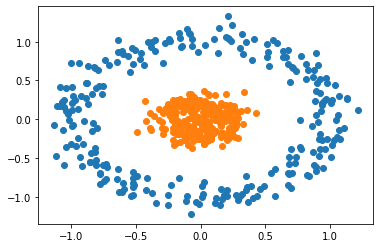

In [19]:
scatter_plot()

In [20]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0  

In [21]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [22]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [23]:
epochs = 1000
losses = []
for epoch in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("Epoch: ", epoch, "Loss: ", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  0.7148522138595581
Epoch:  1 Loss:  0.6947318911552429
Epoch:  2 Loss:  0.6955163478851318
Epoch:  3 Loss:  0.7014891505241394
Epoch:  4 Loss:  0.7013983130455017
Epoch:  5 Loss:  0.6974702477455139
Epoch:  6 Loss:  0.693925678730011
Epoch:  7 Loss:  0.6928598284721375
Epoch:  8 Loss:  0.6939383149147034
Epoch:  9 Loss:  0.6954388618469238
Epoch:  10 Loss:  0.6958754062652588
Epoch:  11 Loss:  0.6949177384376526
Epoch:  12 Loss:  0.6931490302085876
Epoch:  13 Loss:  0.6913898587226868
Epoch:  14 Loss:  0.6901612877845764
Epoch:  15 Loss:  0.6894590854644775
Epoch:  16 Loss:  0.6888433694839478
Epoch:  17 Loss:  0.6877668499946594
Epoch:  18 Loss:  0.6859008073806763
Epoch:  19 Loss:  0.6832481622695923
Epoch:  20 Loss:  0.6800421476364136
Epoch:  21 Loss:  0.6765590310096741
Epoch:  22 Loss:  0.6729680895805359
Epoch:  23 Loss:  0.6692698001861572
Epoch:  24 Loss:  0.6653285622596741
Epoch:  25 Loss:  0.6609664559364319
Epoch:  26 Loss:  0.6560585498809814
Epoch:  27 L

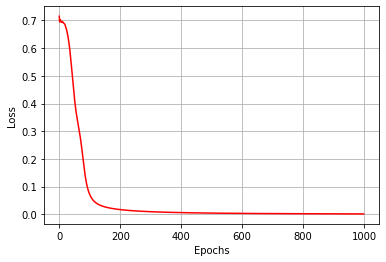

In [24]:
plt.plot(range(epochs), losses, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

In [27]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

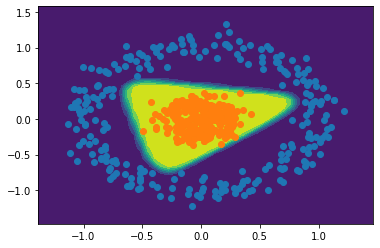

In [29]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is:  0


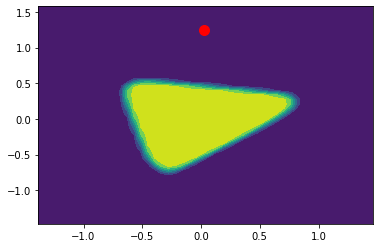

In [32]:
#test with a value

x = 0.025
y = 1.25
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print("Prediction is: ", prediction)
plot_decision_boundary(X, y)

Prediction is:  1


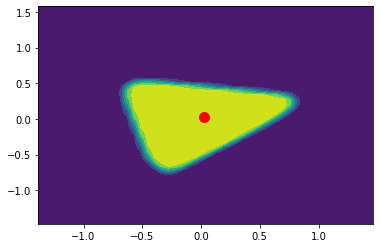

In [33]:
#test with a value

x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print("Prediction is: ", prediction)
plot_decision_boundary(X, y)